In [4]:
class Distribution:
    
    def __init__(self, mu=0, sigma=1):
    
        """ Generic distribution class for calculating and 
        visualizing a probability distribution.
    
        Attributes:
            mean (float) representing the mean value of the distribution
            stdev (float) representing the standard deviation of the distribution
            data_list (list of floats) a list of floats extracted from the data file
            """
        
        self.mean = mu
        self.stdev = sigma
        self.data = []


    def read_data_file(self, file_name):
    
        """Function to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute.
                
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
        with open(file_name) as file:
            data_list=[]
            line=file.readline()
            while line:
                data_list.append(int(line))
                line=file.readline()
        file.close()
        
        self.data=data_list
       

In [5]:
import math
import matplotlib.pyplot as plt

class Gaussian(Distribution):
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu=0, sigma=1):
        
        Distribution.__init__(self, mu, sigma)
    
        
    
    def calculate_mean(self):
    
        """Function to calculate the mean of the data set.
        
        Returns: 
            float: mean of the data set
    
        """
                    
        avg = 1.0 * sum(self.data) / len(self.data)
        
        self.mean = avg
        
        return self.mean



    def calculate_stdev(self, sample=True):

        """Function to calculate the standard deviation of the data set.
        
        Args: 
            sample (bool): whether the data represents a sample or population
        
        Returns: 
            float: standard deviation of the data set
    
        """

        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
    
        mean = self.calculate_mean()
    
        sigma = 0
    
        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
    
        self.stdev = sigma
        
        return self.stdev
        
        
        
    def plot_histogram(self,sample=True):
        """Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        """
        plt.hist(self.data, bins=30, facecolor='purple', edgecolor='black', alpha=0.7)
        plt.grid(True, linestyle='--', alpha=0.5)
        mean=self.calculate_mean()
        stdev=self.calculate_stdev(sample)
        self.mean=mean
        self.stdev=stdev
        plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
        plt.axvline(mean + stdev, color='blue', linestyle='dashed', linewidth=1, label=f'+1 Stdev: {mean + stdev:.2f}')
        plt.axvline(mean - stdev, color='blue', linestyle='dashed', linewidth=1, label=f'-1 Stdev: {mean - stdev:.2f}')
    
        plt.legend()
        plt.tight_layout()
    
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
        plt.show()
        
        
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
        

    def plot_histogram_pdf(self):

        """Function to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        
        Args:
            None
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
        n_spaces=len(self.data)
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
        # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')
        axes[0].set_facecolor('pink')

        axes[1].plot(x, y,color='green',linestyle='-.')
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[1].set_ylabel('Density')
        axes[1].set_xlabel('Data')
        
        plt.show()

        return x, y
        
    def __add__(self, other):
        
        """Function to add together two Gaussian distributions
        
        Args:
            other (Gaussian): Gaussian instance
            
        Returns:
            Gaussian: Gaussian distribution
            
        """
        
        result = Gaussian()
        result.data=self.data+other.data
        result.mean = self.mean + other.mean
        result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
        
        return result
        
        
    def __repr__(self):
    
        """Function to output the characteristics of the Gaussian instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian
        
        """
        
        return "mean {}, standard deviation {}".format(self.mean, self.stdev)
   

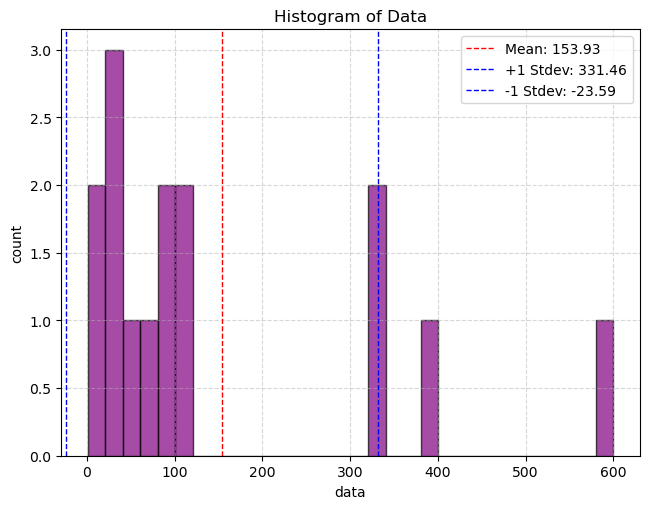

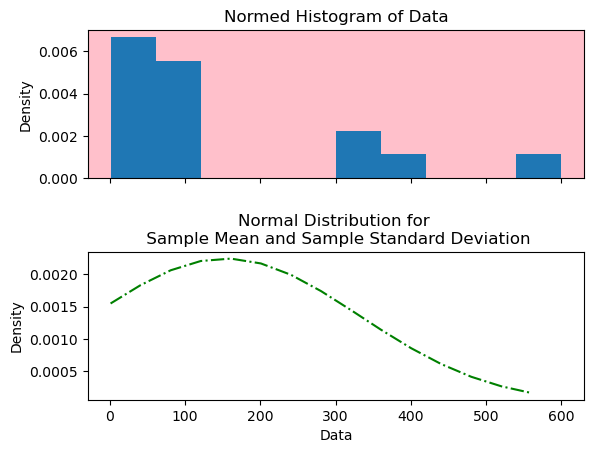

mean 153.93333333333334, standard deviation 177.5236268648151
[1.0, 40.93333333333333, 80.86666666666666, 120.79999999999998, 160.73333333333332, 200.66666666666666, 240.59999999999997, 280.5333333333333, 320.46666666666664, 360.4, 400.3333333333333, 440.26666666666665, 480.19999999999993, 520.1333333333333, 560.0666666666666] [0.0015505935393259327, 0.0018351470968391598, 0.0020647528386256433, 0.002208460025479668, 0.002245614962978584, 0.002170727579851118, 0.001994801264435303, 0.0017426823211659148, 0.0014473084445233173, 0.0011426895260189256, 0.0008576689291457198, 0.0006119774048313311, 0.000415121644396544, 0.00026769462332404203, 0.0001641074128033359]


In [6]:
# initialize two gaussian distributions
gaussian=Gaussian()
gaussian.read_data_file('numbers.txt')
gaussian.plot_histogram(True)
x=gaussian.pdf(90)
y,z=gaussian.plot_histogram_pdf()
print(gaussian)
print(y,z)


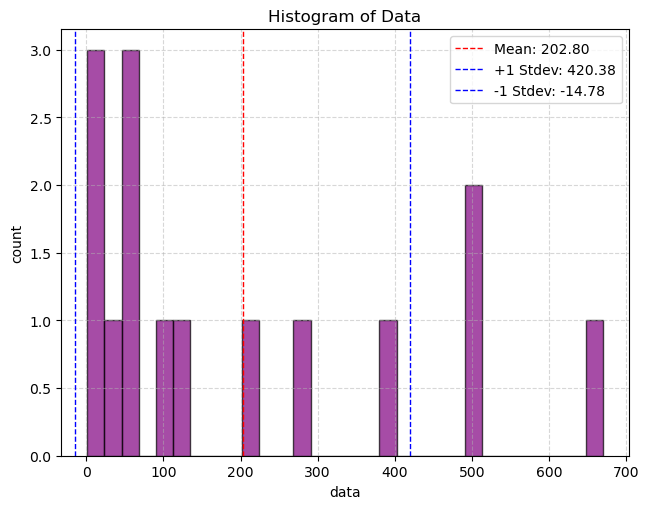

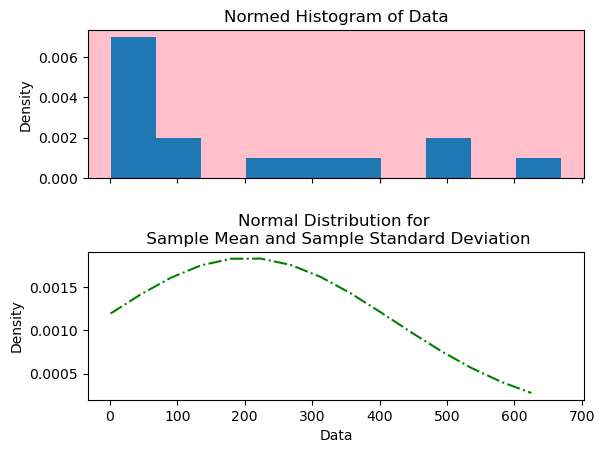

mean 202.8, standard deviation 217.58387545299138
[1.0, 45.6, 90.2, 134.8, 179.4, 224.0, 268.6, 313.2, 357.8, 402.40000000000003, 447.0, 491.6, 536.2, 580.8000000000001, 625.4] [0.001192608307539809, 0.0014123339994217435, 0.0016037239458913356, 0.0017461213784498082, 0.0018229378453675888, 0.0018248278855294256, 0.0017515581997517007, 0.0016120549884144685, 0.0014226161912283646, 0.0012037831460568196, 0.0009767004455112536, 0.0007598487073991906, 0.0005668204207885968, 0.00040543054315433545, 0.00027806098329914274]
202.8
217.58387545299138


In [7]:
gaussian2=Gaussian()
gaussian2.read_data_file('numbers2.txt')
gaussian2.plot_histogram(True)
a=gaussian2.pdf(100)
b,c=gaussian2.plot_histogram_pdf()
print(gaussian2)
print(b,c)
print(gaussian2.mean)
print(gaussian2.stdev)


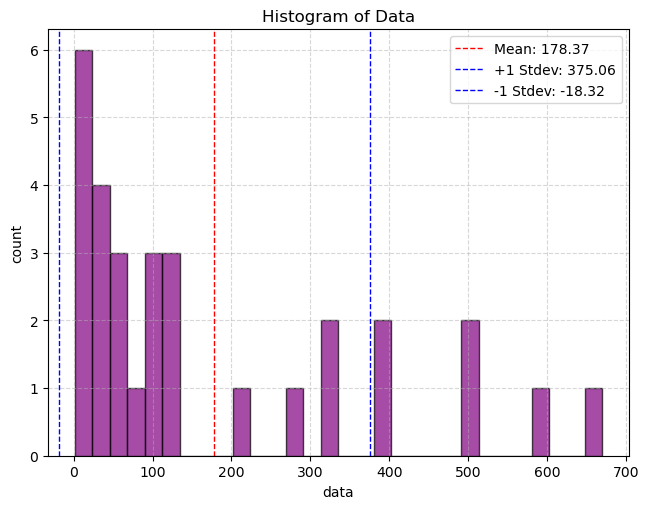

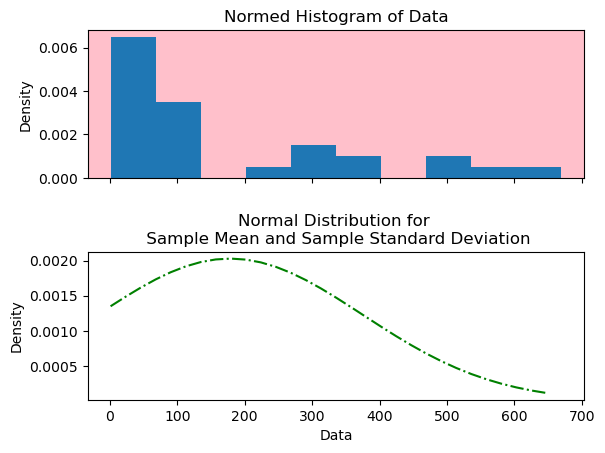

([1.0,
  23.3,
  45.6,
  67.9,
  90.2,
  112.5,
  134.8,
  157.1,
  179.4,
  201.70000000000002,
  224.0,
  246.3,
  268.6,
  290.90000000000003,
  313.2,
  335.5,
  357.8,
  380.1,
  402.40000000000003,
  424.7,
  447.0,
  469.3,
  491.6,
  513.9,
  536.2,
  558.5,
  580.8000000000001,
  603.1,
  625.4,
  647.7],
 [0.001350676217531936,
  0.0014864890636212998,
  0.0016150636052802106,
  0.0017323474044271714,
  0.0018344158560053346,
  0.0019176884315132568,
  0.0019791364984177847,
  0.002016465956749743,
  0.002028259354350838,
  0.0020140652099148062,
  0.0019744266968716004,
  0.0019108471476243058,
  0.0018256954321805524,
  0.001722059513583887,
  0.0016035607982609235,
  0.00147414482348334,
  0.0013378650843781969,
  0.0011986763435902859,
  0.0010602517452426386,
  0.0009258348075666624,
  0.0007981333527751554,
  0.0006792581559908896,
  0.0005707050436922794,
  0.0004733757502815536,
  0.0003876303283341187,
  0.000313362438771661,
  0.00025008841537145715,
  0.00019704147

In [12]:
#adding two distributions
combined=gaussian+gaussian2
combined.plot_histogram(True)
combined.plot_histogram_pdf()